# 02 Generative vs Discriminative Models

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 01, Unit 5** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 02 Generative vs Discriminative Models

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the fundamental difference between generative and discriminative models
- Learn when to use each approach
- See practical examples of both types
- Understand the trade-offs between approaches

## 🔗 Prerequisites

- ✅ Understanding of machine learning basics
- ✅ Knowledge of classification concepts
- ✅ Basic Python knowledge

---

## Real-World Context

**Discriminative Models** (what we've learned):
- Email spam detection (classify spam vs not spam)
- Image classification (identify objects in images)
- Medical diagnosis (classify diseases)

**Generative Models** (new concept):
- Generate new emails that look like spam
- Create new images of objects
- Generate synthetic medical images for training

This notebook helps you understand when to use each approach!


Example 2: Generative vs Discriminative Models

1. Fundamental Difference

DISCRIMINATIVE MODELS:
- Learn P(Y|X) - Probability of label given features
- Focus on decision boundary
- Directly model the conditional probability
- Examples: Logistic Regression, SVM, Neural Networks

GENERATIVE MODELS:
- Learn P(X|Y) and P(Y) - Joint probability distribution
- Model how data is generated
- Can generate new samples
- Examples: Naive Bayes, GANs, VAEs


2. Visual Comparison with Example Data


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_43474/2884690694.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


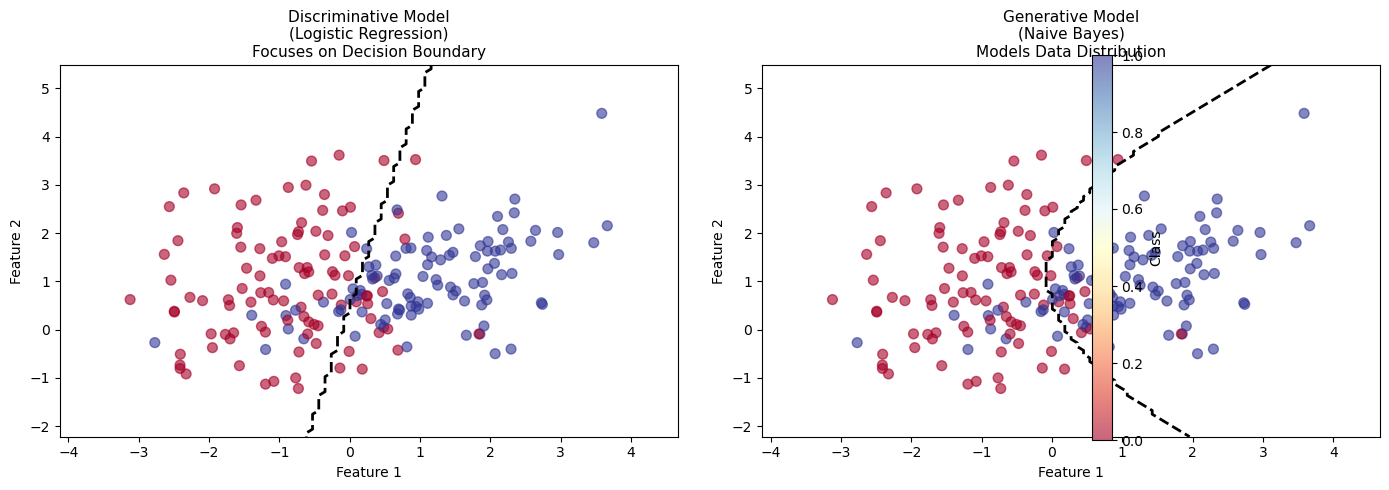


3. When to Use Each Approach

Use DISCRIMINATIVE when:
  • You only need classification/prediction
  • You have limited training data
  • You need fast inference
  • You want high accuracy for classification
  • Examples: Spam detection, image classification

Use GENERATIVE when:
  • You need to generate new data
  • You want to understand data distribution
  • You need to handle missing data
  • You want to detect outliers
  • Examples: Image generation, data augmentation, anomaly detection

4. Practical Example: Email Classification

Discriminative Approach:
  - Learns: P(Spam | email words)
  - Can classify: 'Is this email spam?'
  - Cannot generate: New spam emails

Generative Approach:
  - Learns: P(email words | Spam) and P(Spam)
  - Can classify: 'Is this email spam?'
  - Can generate: New spam emails that look realistic

5. Trade-offs Summary

Discriminative Models:
  Pros:
    + Often better classification accuracy
    + Faster training
    + Simpler models
  Cons:
    - Cann

In [1]:
"""
Unit 5 - Example 2: Generative vs Discriminative Models
الوحدة 5 - مثال 2: النماذج التوليدية مقابل التمييزية

This example demonstrates:
1. Key differences between generative and discriminative models
2. When to use each approach
3. Practical examples
4. Trade-offs and considerations
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

print("=" * 70)
print("Example 2: Generative vs Discriminative Models")
print("=" * 70)

# 1. Fundamental Difference
print("\n" + "=" * 70)
print("1. Fundamental Difference")
print("=" * 70)

comparison = """
DISCRIMINATIVE MODELS:
- Learn P(Y|X) - Probability of label given features
- Focus on decision boundary
- Directly model the conditional probability
- Examples: Logistic Regression, SVM, Neural Networks

GENERATIVE MODELS:
- Learn P(X|Y) and P(Y) - Joint probability distribution
- Model how data is generated
- Can generate new samples
- Examples: Naive Bayes, GANs, VAEs
"""

print(comparison)

# 2. Visual Comparison
print("\n" + "=" * 70)
print("2. Visual Comparison with Example Data")
print("=" * 70)

# Generate sample data
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, 
                          random_state=42)

# Train discriminative model (Logistic Regression)
discriminative_model = LogisticRegression()
discriminative_model.fit(X, y)

# Train generative model (Naive Bayes)
generative_model = GaussianNB()
generative_model.fit(X, y)

# Create decision boundary visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot data
for ax in axes:
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', alpha=0.6, s=50)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Discriminative model decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
Z_disc = discriminative_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_disc = Z_disc.reshape(xx.shape)
axes[0].contour(xx, yy, Z_disc, levels=[0.5], colors='black', linestyles='--', linewidths=2)
axes[0].set_title('Discriminative Model\n(Logistic Regression)\nFocuses on Decision Boundary', fontsize=11)

# Generative model decision boundary
Z_gen = generative_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_gen = Z_gen.reshape(xx.shape)
axes[1].contour(xx, yy, Z_gen, levels=[0.5], colors='black', linestyles='--', linewidths=2)
axes[1].set_title('Generative Model\n(Naive Bayes)\nModels Data Distribution', fontsize=11)

plt.colorbar(scatter, ax=axes, label='Class')
plt.tight_layout()
plt.show()

# 3. When to Use Each
print("\n" + "=" * 70)
print("3. When to Use Each Approach")
print("=" * 70)

use_cases = {
    "Use DISCRIMINATIVE when:": [
        "You only need classification/prediction", "You have limited training data",
        "You need fast inference",
        "You want high accuracy for classification",
        "Examples: Spam detection, image classification"
    ],
    "Use GENERATIVE when:": [
        "You need to generate new data",
        "You want to understand data distribution",
        "You need to handle missing data",
        "You want to detect outliers",
        "Examples: Image generation, data augmentation, anomaly detection"
    ]
}

for category, cases in use_cases.items():
    print(f"\n{category}")
    for case in cases:
        print(f"  • {case}")

# 4. Practical Example: Text Classification
print("\n" + "=" * 70)
print("4. Practical Example: Email Classification")
print("=" * 70)

example_emails = {
    "Spam": [
        "Win $1000 now! Click here!", "Free money! Limited time offer!",
        "Congratulations! You've won!"
    ],
    "Not Spam": [
        "Meeting scheduled for tomorrow",
        "Project update: Status report",
        "Team lunch this Friday"
    ]
}

print("\nDiscriminative Approach:")
print("  - Learns: P(Spam | email words)")
print("  - Can classify: 'Is this email spam?'")
print("  - Cannot generate: New spam emails")

print("\nGenerative Approach:")
print("  - Learns: P(email words | Spam) and P(Spam)")
print("  - Can classify: 'Is this email spam?'")
print("  - Can generate: New spam emails that look realistic")

# 5. Trade-offs
print("\n" + "=" * 70)
print("5. Trade-offs Summary")
print("=" * 70)

tradeoffs = {
    "Discriminative Models": {
        "Pros": ["Often better classification accuracy", "Faster training", "Simpler models"],
        "Cons": ["Cannot generate data", "Less interpretable", "Requires labeled data"]
    },
    "Generative Models": {
        "Pros": ["Can generate new data", "More interpretable", "Handles missing data"],
        "Cons": ["Often lower classification accuracy", "More complex", "Requires more data"]
    }
}

for model_type, aspects in tradeoffs.items():
    print(f"\n{model_type}:")
    print("  Pros:")
    for pro in aspects["Pros"]:
        print(f"    + {pro}")
    print("  Cons:")
    for con in aspects["Cons"]:
        print(f"    - {con}")

# 6. Summary
print("\n" + "=" * 70)
print("6. Key Takeaways")
print("=" * 70)

takeaways = [
    "Discriminative models focus on classification boundaries", "Generative models learn data distributions",
    "Choose based on your goal: classification vs generation",
    "Both approaches have their place in AI applications",
    "Modern AI often combines both approaches"
]

for i, takeaway in enumerate(takeaways, 1):
    print(f"{i}. {takeaway}")

print("\n" + "=" * 70)
print("Next: Course Summary and Integration")
print("=" * 70)
